In [541]:
import pandas as pd
# Import libraries for text preprocessing
import re
import nltk

# You only need to download these resources once. After you run this 
# the first time--or if you know you already have these installed--
# you can comment these two lines out (with a #)
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kinga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kinga\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [766]:
df = pd.read_csv("text-survey-metadata.csv")

c:\Users\Kinga\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [715]:
df = df[df["language"] == "en"]

In [717]:
df = df.dropna(subset=["video_id"])
df['text'] = df['text'].fillna("Nan")
df['video_description'] = df['video_description'].fillna("Nan")

df['text'] = df['text'].str.lower()
df['video_description'] = df['video_description'].str.lower()

In [645]:
titok_stopwords = ['fyp', "foryou", "foryoupage", "greenscreen", "dlaciebie", "fy", "duet", "stitch", "reply", "cd", "u", "fypage", "cupcut", 
                    "replying"]

path = "C:/Users/Kinga/Desktop/Research Master/Newsflow/Code/"
my_file = open(path + "polish.stopwords.txt", "r", encoding='utf-8')
polish_stopwords = my_file.read().split('\n')
stop_word_list = list(set(stopwords.words("dutch") + stopwords.words("english") + polish_stopwords + titok_stopwords))

In [646]:
def pre_processing(df):
    # Pre-process dataset to get a cleaned and normalised text corpus
    corpus = []
    df['word_count'] = df.col.apply(lambda x: len(str(x).split(" ")))
    ds_count = len(df['word_count'])
    for i in range(0, ds_count):
        # Remove punctuation
        text = re.sub('[^a-zA-Z]', ' ', str(df.col.iloc[i]))
        
        # Convert to lowercase
        text = text.lower()
        
        # Remove tags
        text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)

        text=re.sub(r'\b\w{1,2}\b', '', text)
        
        # Remove special characters and digits
        text=re.sub("(\\d|\\W)+"," ",text)
        
        # Convert to list from string
        text = text.split()
        
        # Stemming
        ps=PorterStemmer()
        
        # Lemmatisation
        lem = WordNetLemmatizer()
        text = [lem.lemmatize(word) for word in text if not word in  
                stop_word_list] 
        corpus.append(text)

    return corpus

In [722]:
pl_df = df[df["Residence"] == "Poland"]
nl_df = df[df["Residence"] == "Netherlands"]

import itertools

nl_corpus = pre_processing(nl_df)
nl = list(itertools.chain.from_iterable(nl_corpus))

pl_corpus = pre_processing(pl_df)
pl= list(itertools.chain.from_iterable(pl_corpus))

C:\Users\Kinga\AppData\Local\Temp/ipykernel_8900/3296978887.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df.col.apply(lambda x: len(str(x).split(" ")))


----

c:\Users\Kinga\anaconda3\lib\site-packages\shifterator\plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


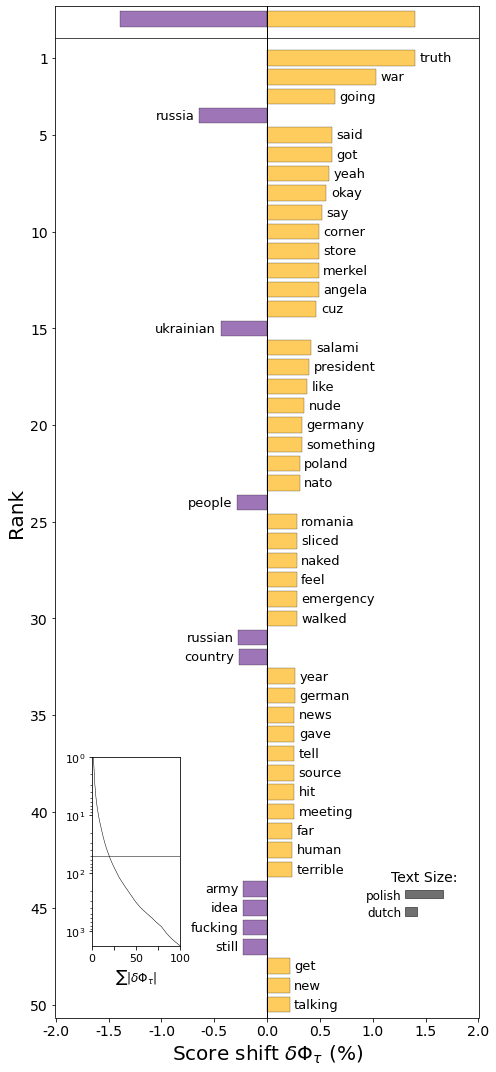

<AxesSubplot:xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [723]:
import shifterator as sh
from collections import Counter

# dutch = Counter(relevantdutchtexts.split())
# polish = Counter(relevantpolishtexts.split())

dutch = Counter(nl)
polish = Counter(pl)

proportion_shift = sh.ProportionShift(type2freq_1=polish,
                                      type2freq_2=dutch)
proportion_shift.get_shift_graph(system_names = ['polish', 'dutch'])

c:\Users\Kinga\anaconda3\lib\site-packages\shifterator\plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


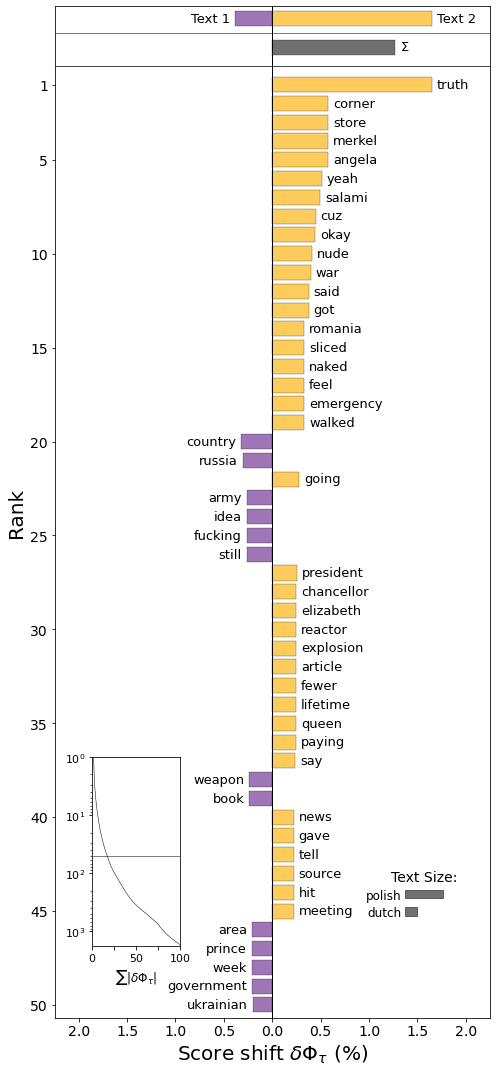

<AxesSubplot:xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [724]:
import shifterator as sh
from collections import Counter

# dutch = Counter(relevantdutchtexts.split())
# polish = Counter(relevantpolishtexts.split())

dutch = Counter(nl)
polish = Counter(pl)

proportion_shift = sh.JSDivergenceShift(type2freq_1=polish,
                                      type2freq_2=dutch,
                                      weight_1=0.5,
                                      weight_2=0.5,
                                      base=2,
                                      alpha=1)
proportion_shift.get_shift_graph(system_names = ['polish', 'dutch'])

c:\Users\Kinga\anaconda3\lib\site-packages\shifterator\plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


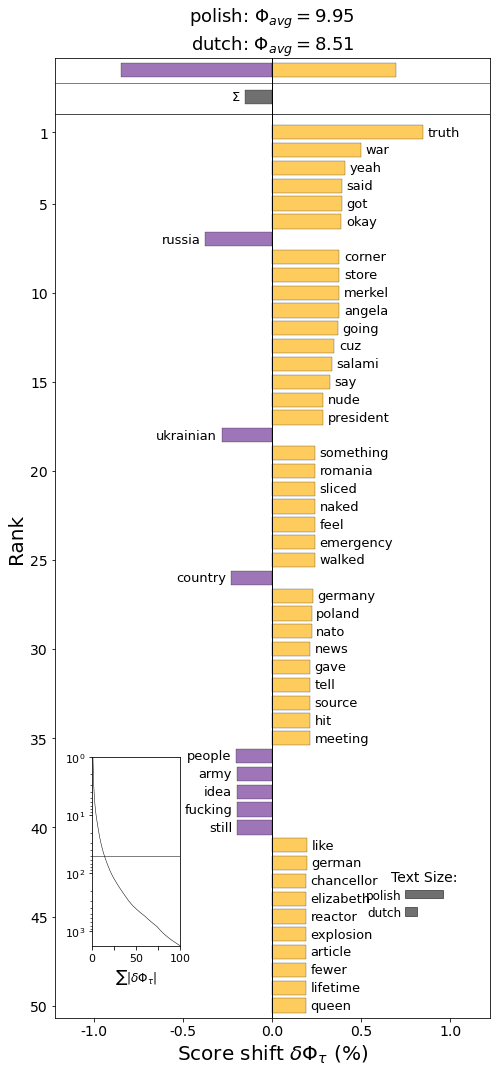

<AxesSubplot:title={'center':'polish: $\\Phi_{avg}=$9.95\ndutch: $\\Phi_{avg}=$8.51'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [725]:
dutch = Counter(nl)
polish = Counter(pl)
entropy_shift = sh.EntropyShift(type2freq_1=polish,
                                type2freq_2=dutch,
                                base=2)
entropy_shift.get_shift_graph(system_names = ['polish', 'dutch'])

c:\Users\Kinga\anaconda3\lib\site-packages\shifterator\plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


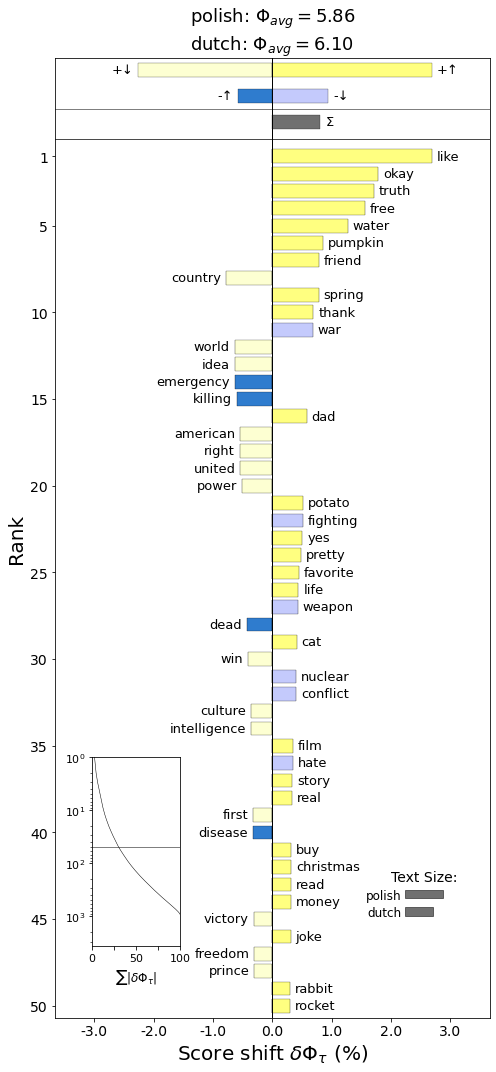

<AxesSubplot:title={'center':'polish: $\\Phi_{avg}=$5.86\ndutch: $\\Phi_{avg}=$6.10'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [762]:
dutch = Counter(nl)
polish = Counter(pl)

sentiment_shift = sh.WeightedAvgShift(type2freq_1=polish,
                                      type2freq_2=dutch,
                                      type2score_1='labMT_English',
                                      reference_value=5,
                                      stop_lens=[(4,6)])

sentiment_shift.get_shift_graph(detailed=True,
                                system_names=['polish', 'dutch'])

https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

c:\Users\Kinga\anaconda3\lib\site-packages\shifterator\plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


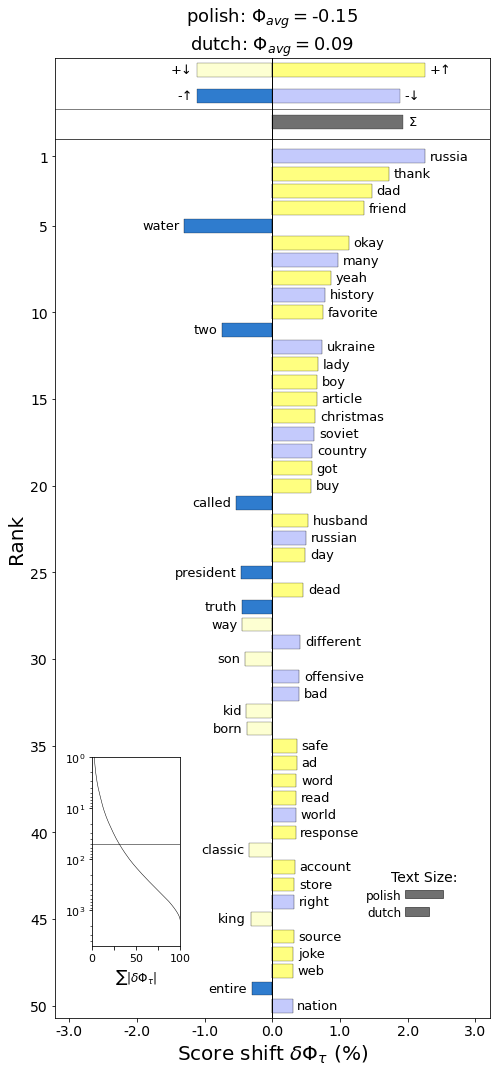

<AxesSubplot:title={'center':'polish: $\\Phi_{avg}=$-0.15\ndutch: $\\Phi_{avg}=$0.09'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [745]:
dutch = Counter(nl)
polish = Counter(pl)

sentiment_shift = sh.WeightedAvgShift(type2freq_1=polish,
                                      type2freq_2=dutch,
                                      type2score_1='SocialSent-Reddit_politics',
                                      type2score_2='SocialSent-Reddit_politics')

sentiment_shift.get_shift_graph(system_names=['polish', 'dutch'])